# Atividade 3 - Modelos Preditivos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from plot_roc_curve import plot_roc_curve
from sklearn.model_selection import KFold



In [2]:
data_df = pd.read_csv("winequality-red.csv", delimiter=';')
data_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
data_df["quality"].unique()
# [3, 4, 5, 6, 7, 8]

array([5, 6, 7, 4, 8, 3])

## Teste com o dataset completo

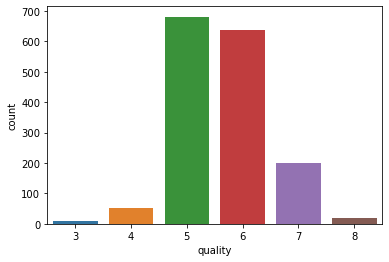

In [4]:
ax = sn.countplot(x="quality", data=data_df)

In [5]:
# Dataset split train and test
Y = np.array(data_df["quality"].values)
X_data = data_df.copy()
X_data = np.array(X_data.drop(columns='quality').values)
# Binarize the output
Y_data = label_binarize(Y, classes=[3, 4, 5, 6, 7, 8 ])
n_classes = Y_data.shape[1]

# shuffle and split training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.25, random_state=0)

In [6]:
Y_data_nai = data_df.copy()
Y_data_nai.loc[Y_data_nai["quality"] == 3, "quality"] = 0
Y_data_nai.loc[Y_data_nai["quality"] == 4, "quality"] = 1
Y_data_nai.loc[Y_data_nai["quality"] == 5, "quality"] = 2
Y_data_nai.loc[Y_data_nai["quality"] == 6, "quality"] = 3
Y_data_nai.loc[Y_data_nai["quality"] == 7, "quality"] = 4
Y_data_nai.loc[Y_data_nai["quality"] == 8, "quality"] = 5

Y_data_nai = np.array(Y_data_nai["quality"].values)

#X_train_nai, X_test_nai, y_train_nai, y_test_nai = train_test_split(X_data, Y_data_nai, test_size=0.25, random_state=0)

## Teste com classificação binaria

In [7]:
### Removendo as classes desbalanciadas
X_data_balan = data_df.copy()
X_data_balan = X_data_balan.drop(X_data_balan.loc[X_data_balan["quality"] == 8, "quality"].index)
X_data_balan = X_data_balan.drop(X_data_balan.loc[X_data_balan["quality"] == 3, "quality"].index)
X_data_balan = X_data_balan.drop(X_data_balan.loc[X_data_balan["quality"] == 4, "quality"].index)
X_data_balan = X_data_balan.drop(X_data_balan.loc[X_data_balan["quality"] == 7, "quality"].index)

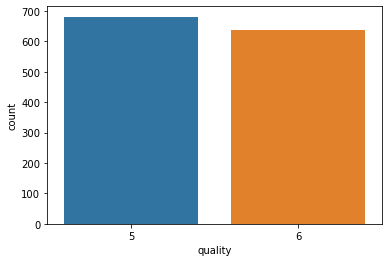

In [8]:
ax = sn.countplot(x="quality", data=X_data_balan)

In [9]:
Y_balan = np.array(X_data_balan["quality"].values)
X_data_b = X_data_balan.copy()
X_data_b = np.array(X_data_balan.drop(columns='quality').values)

# Binarize the output
Y_data_balan = label_binarize(Y_balan, classes=[5, 6])
n_classes_b = Y_data_balan.shape[1]

# shuffle and split training and test sets
#X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_data_b, Y_data_balan, test_size=0.25, random_state=0)

In [10]:
Y_data_nai_b = X_data_balan.copy()
Y_data_nai_b.loc[Y_data_nai_b["quality"] == 5, "quality"] = 0
Y_data_nai_b.loc[Y_data_nai_b["quality"] == 6, "quality"] = 1
Y_data_nai_b = np.array(Y_data_nai_b["quality"].values)

#X_train_nai_b, X_test_nai_b, y_train_nai_b, y_test_nai_b = train_test_split(X_data_b, Y_data_nai_b, test_size=0.25, random_state=0)

In [11]:
# Save matrics
names_result_metrics = [ # KNN
                
               ["KNeighborsClassifier(n_neighbors=5, metric='minkowski' ",  
                "KNeighborsClassifier(n_neighbors=3, metric= 'euclidean' ",   
                "KNeighborsClassifier(n_neighbors=2, metric= 'mahalanobis' "
               ], 
    
                # Naive Bayes
                [ "GaussianNB()", "MultinomialNB()", "BernoulliNB()"],
                # Arvore de Decisão
                [ "DecisionTreeClassifier(criterion='gini')", "DecisionTreeClassifier(criterion='entropy')" ],
                # MLP
                [ "MLPClassifier(learning_rate_init=0.001)",  
                  "MLPClassifier(learning_rate_init=0.005)", 
                  "MLPClassifier(learning_rate_init=0.010)",
                  "MLPClassifier(learning_rate_init=0.0005)"],
                [   "SVC(C = 1.0, gamma = scale, kernel = 'linear', probability=True, degree = 2)",
                    "SVC(C = 10.0, gamma = auto, kernel = 'rbf', probability=True, degree = 3)"
                    ]
              ]

In [12]:
list_models = [ # KNN
                [ KNeighborsClassifier(n_neighbors=5, metric='minkowski'),  
                  KNeighborsClassifier(n_neighbors=3, metric= 'euclidean'),  
                  KNeighborsClassifier(n_neighbors=2, metric= 'manhattan')], 
                # Naive Bayes
                [ GaussianNB(), MultinomialNB(), BernoulliNB()],
                # Arvore de Decisão
                [ DecisionTreeClassifier(criterion='gini'), DecisionTreeClassifier(criterion='entropy') ],
                # MLP
                [ MLPClassifier(learning_rate_init=0.001),  
                  MLPClassifier(learning_rate_init=0.005), 
                  MLPClassifier(learning_rate_init=0.010),
                  MLPClassifier(learning_rate_init=0.0005)],
                [   SVC(C = 1.0, gamma = "scale", kernel = 'linear', probability=True, degree = 2),
                    SVC(C = 10.0, gamma = "auto", kernel = 'rbf', probability=True, degree = 3)]
              ]

In [13]:
# Função para realizar a validação cruzada
def kfold(model, X, y, folds=5): 
    kf = KFold(n_splits=folds) 
    acc_history = []
    history_precision = []
    history_recal = []
    history_f1 = []
    proba = []
    for train_index, test_index in kf.split(X): 
        # print("TRAIN:", train_index, "TEST:", test_index) 
        X_train, X_test = X[train_index], X[test_index] 
        y_train, y_test = y[train_index], y[test_index] 
 
        model.fit(X_train, y_train) 
        y_pred = model.predict(X_test)
        
        acc_history.append(accuracy_score(y_test, y_pred)) 
        history_precision.append(precision_score(y_test, y_pred, average='macro'))
        history_recal.append(recall_score(y_test, y_pred, average='macro'))
        history_f1.append(f1_score(y_test, y_pred, average='macro'))
        
        proba.append(model.predict_proba(X_test))
    history_pred = proba[0]
    for i in range(1, len(proba)):
        history_pred = np.concatenate((history_pred, proba[i]), axis=0)
    #plot_roc_curve(n_classes, y, history_pred)
    #print(history_pred)
    return np.mean(np.array(acc_history)), np.mean(np.array(history_precision)), np.mean(np.array(history_recal)), np.mean(np.array(history_f1)), history_pred

In [14]:
# Função para realizar a classificação com todos os modelos
def predict_model(list_models, X_data, y_data, y_data_nai):

    pred_list = []
    list_result_metrics = []
    list_history_pred = []
    for i in range(0, len(list_models)):
        model_i = list_models[i]
        pred_i = []
        metric_i = []
        for j in range(0, len(model_i)):
            try:
                model = model_i[j]
                acc, precision, recal, f1, history_pred = kfold(model, X_data,  y_data, folds=5)
                #metric_i.append({names_result_metrics[i][j]: [acc, precision, recal, f1]})
                #print(acc)

            except:
                pass
                model = model_i[j]
                acc, precision, recal, f1, history_pred = kfold(model, X_data, y_data_nai, folds=5)

            metric_i.append({names_result_metrics[i][j]: [acc, precision, recal, f1]})
            pred_list.append(history_pred)


        list_result_metrics.append(metric_i)
        list_history_pred.append(pred_list)
        
    
    return  list_result_metrics, list_history_pred
    

### Resultados com dataset com  2 classes (5, 6)

In [15]:
list_result_metrics_b,list_history_pred_b  = predict_model(list_models, X_data_b, Y_data_balan, Y_data_nai_b)

/home/bruno/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/bruno/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/bruno/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/bruno/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

In [16]:
list_result_metrics_b

[[{"KNeighborsClassifier(n_neighbors=5, metric='minkowski' ": [0.5223672082037101,
    0.5139488678660515,
    0.5140860603488268,
    0.5098720934937969]},
  {"KNeighborsClassifier(n_neighbors=3, metric= 'euclidean' ": [0.5435764488996429,
    0.5335553818709952,
    0.5331983861089958,
    0.5301841716378958]},
  {"KNeighborsClassifier(n_neighbors=2, metric= 'mahalanobis' ": [0.560286323309137,
    0.5591705612196967,
    0.5477985997963069,
    0.5277132732031639]}],
 [{'GaussianNB()': [0.682365479893997,
    0.6702303706179997,
    0.6715895897948114,
    0.6687040492880423]},
  {'MultinomialNB()': [0.6034767830395207,
    0.6020742717506795,
    0.598111664491975,
    0.5864238303107163]},
  {'BernoulliNB()': [0.411752506049084,
    0.2540336746989128,
    0.49270787016451756,
    0.3002157468322567]}],
 [{"DecisionTreeClassifier(criterion='gini')": [0.6020134808157621,
    0.5967652650905519,
    0.5986068991502267,
    0.593336000540414]},
  {"DecisionTreeClassifier(criterion='e

## Resultados com o dataset completo

In [17]:
list_result_metrics ,list_history_pred  = predict_model(list_models, X_data, Y_data, Y_data_nai)

/home/bruno/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bruno/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bruno/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/home/bruno/anaconda3/lib/python3.8/site-packages/sklearn

In [18]:
list_result_metrics

[[{"KNeighborsClassifier(n_neighbors=5, metric='minkowski' ": [0.43840125391849527,
    0.21511187485720554,
    0.20570307826696932,
    0.20338002049477483]},
  {"KNeighborsClassifier(n_neighbors=3, metric= 'euclidean' ": [0.42777821316614417,
    0.2428588564057212,
    0.20490817278692536,
    0.21104094963450354]},
  {"KNeighborsClassifier(n_neighbors=2, metric= 'mahalanobis' ": [0.44591496865203767,
    0.2363442328392585,
    0.19689215056532433,
    0.19662269014825942]}],
 [{'GaussianNB()': [0.5272492163009405,
    0.30373250226339055,
    0.30662162341092253,
    0.29776975072566425]},
  {'MultinomialNB()': [0.440262539184953,
    0.2179619458320543,
    0.24444617911278604,
    0.21522200933019806]},
  {'BernoulliNB()': [0.3427801724137931,
    0.0891454857248795,
    0.17627155536066424,
    0.09570297612614101]}],
 [{"DecisionTreeClassifier(criterion='gini')": [0.4509188871473354,
    0.2788241012095524,
    0.2501957594638927,
    0.2502842330524709]},
  {"DecisionTreeCla

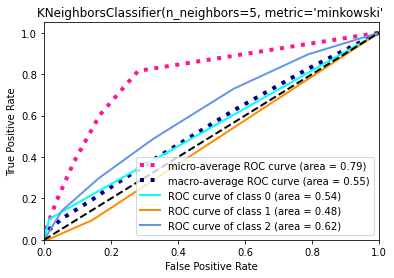

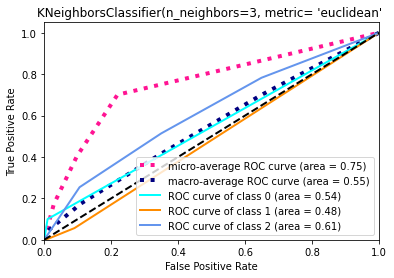

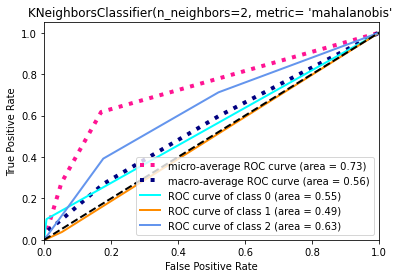

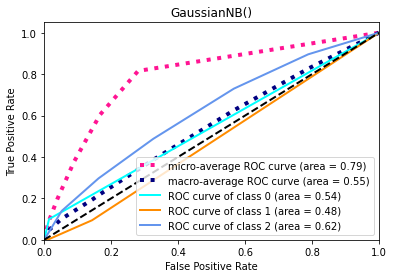

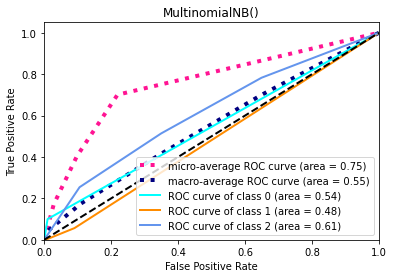

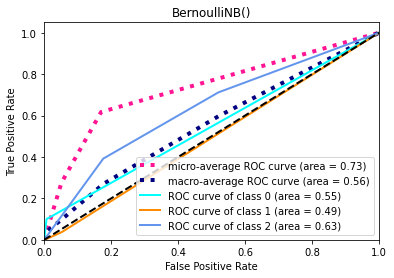

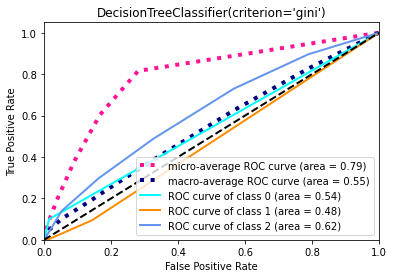

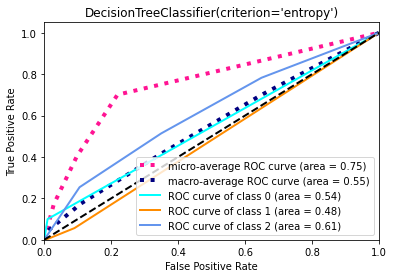

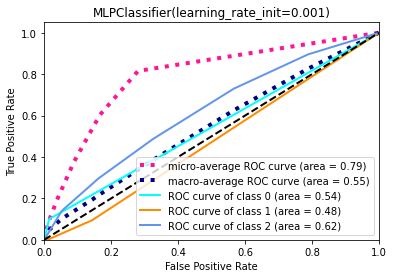

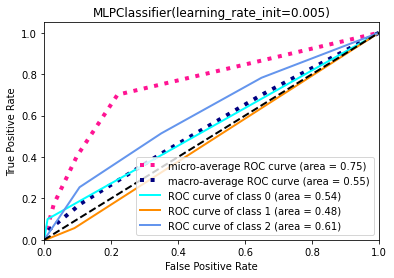

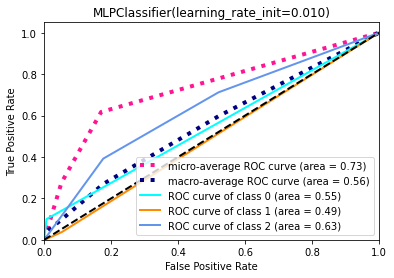

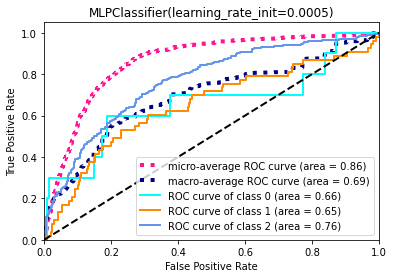

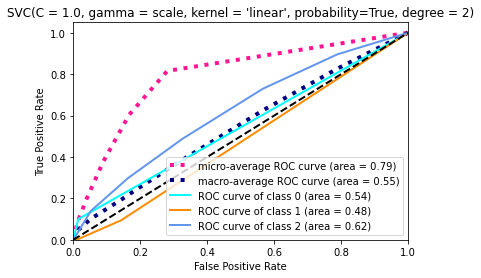

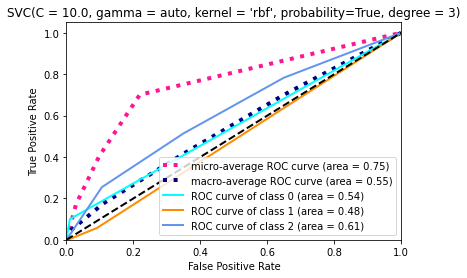

In [19]:
# Roc curva 
for i in range(0, len(names_result_metrics)):
    for j in range(0, len(names_result_metrics[i])):
        plot_roc_curve(3, Y_data, list_history_pred[i][j], names_result_metrics[i][j])

In [20]:
def plot_metrics_bar(list_acc, list_acc_b):

    data = {'Acurácia dataset completo': list_acc, 
            'Acurácia dataset balanceado': list_acc_b 
           } 
    df = pd.DataFrame(data, columns=['Acurácia dataset completo', 'Acurácia dataset balanceado'], 
                      index =  [' KNN', 'Naive Bayes', 'Árvore de Decisão', 'MLP', 'SVM']) 

    df.plot.barh(figsize=(13,7)) 
    plt.title('Acurácia dos modelos de acordo  com os melhores parâmetros.') 
    plt.ylabel('Classificador') 
    plt.xlabel('ACC %')
    plt.legend(loc ='lower right')
    plt.legend(bbox_to_anchor =(0.92, 0.87))
    #plt.tight_layout()  
    plt.show()

In [21]:
list_acc = [0.445, 0.527, 0.479, 0.360, 0.569]

In [22]:
list_acc_b = [0.560, 0.682, 0.602, 0.657, 0.689]

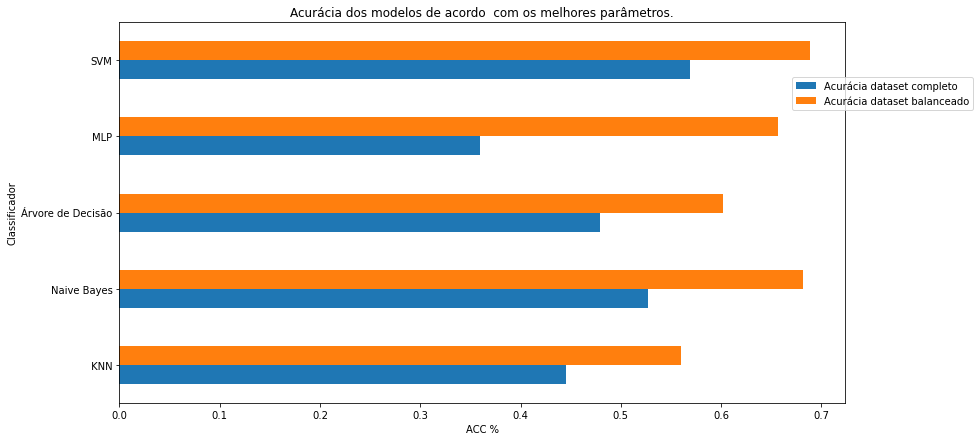

In [23]:
plot_metrics_bar(list_acc, list_acc_b)